#### 머신러닝 과정

1. 데이터 수집 - 크롤링 또는 DB 데이터를 통하여 데이터 수집
2. 데이터 분석 및 전처리 - 수집한 데이터를 분석하고 머신러닝에 사용할 형태로 전처리
3. 머신러닝 학습 - 머신러닝 모델을 사용하여 데이터를 학습
4. 머신러닝 평가 - 학습된 머신러닝 모델을 평가용 데이터를 사용하여 평가

#### 데이터 전처리의 역할
    
    * 머신러닝의 입력 형태로 데이터 변환(특성 엔지니어링)
    * 결측값 및 이상치를 처리하여 데이터 정제
    * 학습용 및 평가용 데이터 분리 - 머신러닝의 객관성을 높이기 위해서

#### 범주형 자료 전처리

* 명목형 자료
    - 수치 맵핑 방식
    - 더미(Dummy) 기법
* 순서형 자료
    - 수치 맵핑 방식

#### 수치형 자료 전처리

- 머신러닝의 입력으로 바로 사용할 수 있으나, 모델의 성능을 높이기 위해서 데이터 변환이 필요

* 대표적인 수치형 자료 변환 방식
    * Scaling(스케일링)
        - 변수 값의 범위 및 크기를 변환하는 방식
        - 변수(Feature) 간의 범위가 차이가 나면 사용
        <br><br>
    * Normalization(정규화)
        - 변수 X를 정규화한 값 X'<br>
        $ X' = \frac{X - X_(min)}{X_(max) - X_(min)}$
        <br><br>
    * Standardization(표준화)
        - 변수 X를 표준화한 값 X'<br>
        $ X' = \frac{X - \mu}{\sigma}$
        <br><br>
    * 범주화
        - 변수의 값보다 범주가 중요한 경우 사용

#### 결측값(Missing data) 처리하기

일반적인 머신러닝 모델의 입력 값으로 결측값을 사용할 수 없음
따라서 Null, None, NaN 등의 결측값을 처리해야 함

* 대표적인 결측값 처리 방식
    - 결측값이 존재하는 샘플 삭제
    - 결측값이 많이 존재하는 변수 삭제
    - 결측값을 다른 값으로 대체

#### 이상치(Outlier) 처리하기

이상치가 있으면, 모델의 성능을 저하할 수 있음
이상치는 일반적으로 전처리 과정에서 제거하며, 어떤 값이 이상치인지 판단하는 기준이 중요함

* 이상치 판단 기준 방법
    - 통계 지표(카이제곱 검정, IQR 지표 등)를 사용하여 판단
    - 데이터 분포를 보고 직접 판단
    - 머신러닝 기법을 사용하여 이상치 분류

머신러닝 모델을 평가하기 위해서는 학습에 사용하지 않은 평가용 데이터가 필요하다.
약 7:3 또는 8:2 비율로 학습용, 평가용 데이터를 분리한다.

* 지도학습 데이터 분리
    - 지도학습의 경우 feature 데이터와 label 데이터를 분리하여 저장한다.
        - Feature 데이터 : label을 예측하기 위한 입력 값
        - Label 데이터 : 예측해야 할 대상이 되는 데이터
        
        ex) Titanic 데이터를 예로 들 경우,<br>
            Feature : Passengerid, Pclass, Name 등 Survived를 제외한 나머지 데이터<br>
            Label : 생존여부를 예측해야 함으로 Survived

## Practice - Titanic

In [112]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

train = pd.read_csv('./data/titanic/train.csv')
test = pd.read_csv('./data/titanic/test.csv')

#### Exploratory Data Analysis

In [113]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Data Dictionary

* Survived : 0 = 사망, 1 = 생존
* Pclass : 승객의 등급
* SibSp : 함께 탑승한 형제자매 또는 배우자수
* Parch : 함께 탑승한 부모 또는 자녀수
* Ticket : 티켓번호
* Cabin : 선실번호
* Embarked : 탑승장소 (S=Southhampton, C=Cherbourg, Q=Queenstown)

In [115]:
train.columns, test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

train 데이터 셋에는 'Survived'가 존재하지만, test 데이터 셋에는 없다.
따라서, 'Survived'를 제외한 나머지 데이터들인 Feature들을 통해 Label 데이터를 예측해보자.

In [116]:
train.shape

(891, 12)

In [117]:
test.shape

(418, 11)

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked 결측치 존재 확인 > Feature Engineeing 이용하여 결측치 처리 필요

In [120]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [121]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [122]:
# Feature에 따른 생존여부 분포를 막대차트로 표현하는 함수를 정의해보자.
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked = True, figsize = (8, 6), rot = 50)

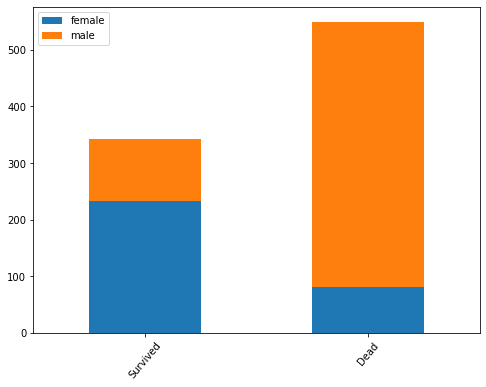

In [123]:
bar_chart('Sex')

여성의 생존률이 높다는 것을 알 수 있다.

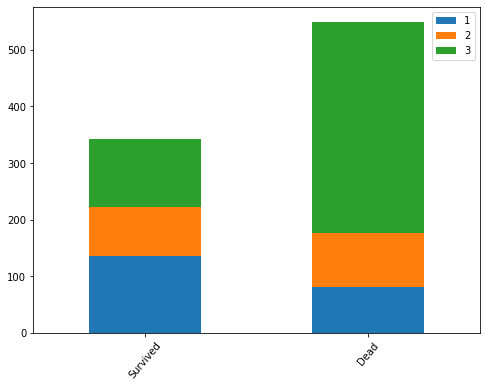

In [124]:
bar_chart('Pclass')

1등급의 사람들이 다른 클래스의 사람들보다 생존가능성이 더 높다는 것을 알 수 있다.

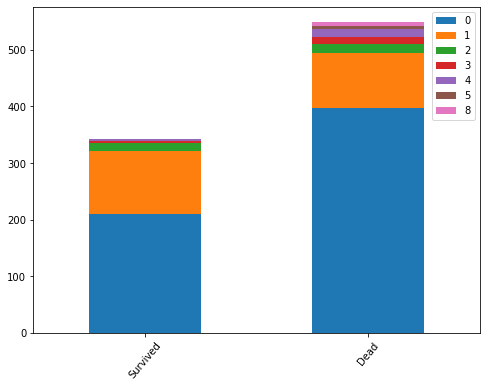

In [125]:
bar_chart('SibSp')

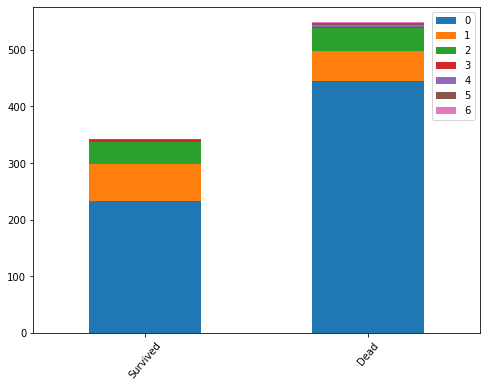

In [126]:
bar_chart('Parch')

혼자 탄 사람들에 비해 가족들과 같이 탑승한 사람들의 생존률이 높다.

## Feature Engineering

### 1. Name

In [127]:
train_test_data = [train, test]

for df in train_test_data:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [128]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Countess      1
Mme           1
Don           1
Jonkheer      1
Lady          1
Ms            1
Capt          1
Sir           1
Name: Title, dtype: int64

In [129]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [130]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


* 추출한 Title을 숫자로 맵핑

In [131]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for df in train_test_data:
    df['Title'] = df['Title'].map(title_mapping)

In [132]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [133]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


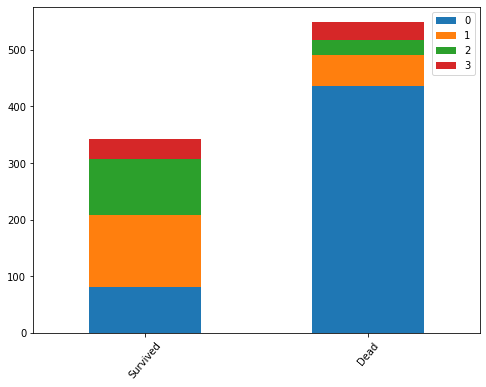

In [134]:
bar_chart('Title')

* 불필요한 'Name'컬럼 삭제

In [135]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [136]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [137]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [138]:
#

### 2. Sex

In [139]:
sex_mapping = {'male':0, 'female':1}
for df in train_test_data:
    df['Sex'] = df['Sex'].map(sex_mapping)

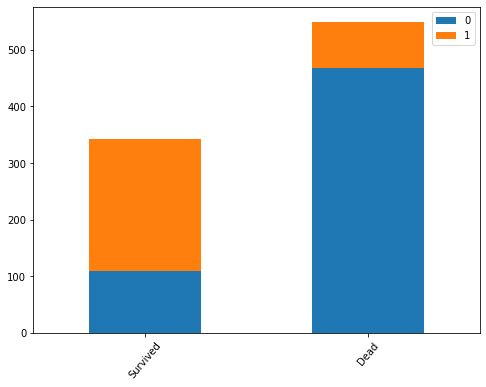

In [140]:
bar_chart('Sex')

### 3. Age

In [141]:
train['Age'].isnull().sum() # 177개의 train데이터의 'Age'컬럼 결측치 확인

177

In [142]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [143]:
train.groupby('Title')['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

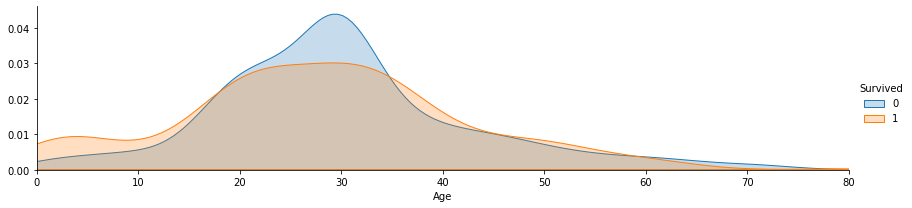

In [144]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

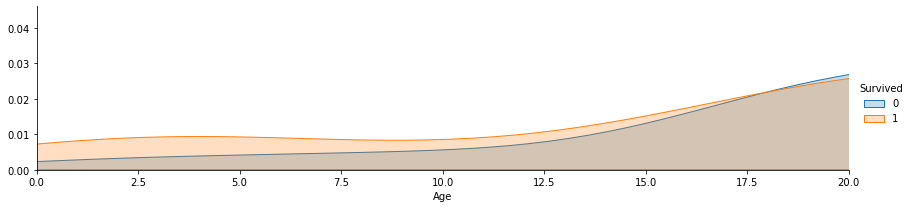

In [145]:
# 구획을 나눠서 좀 더 상세히 그래프를 확인 - 20세 아래의 생존 여부
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

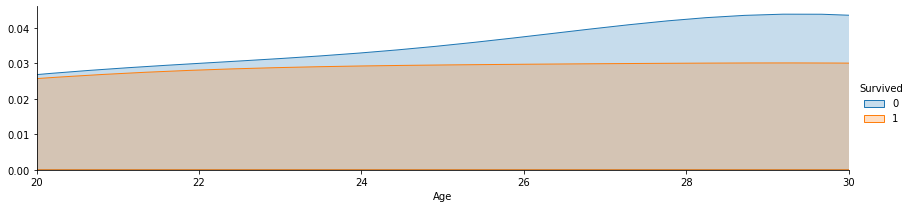

In [146]:
# 20 ~ 30세 사이의 그래프
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

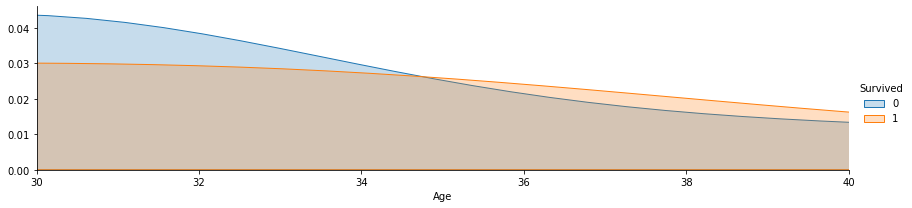

In [147]:
# 30 ~ 40세 사이의 그래프
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 60.0)

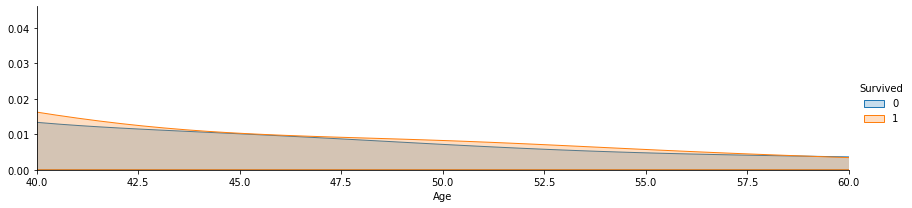

In [148]:
# 40 ~ 60세 사이의 그래프
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60.0, 80.0)

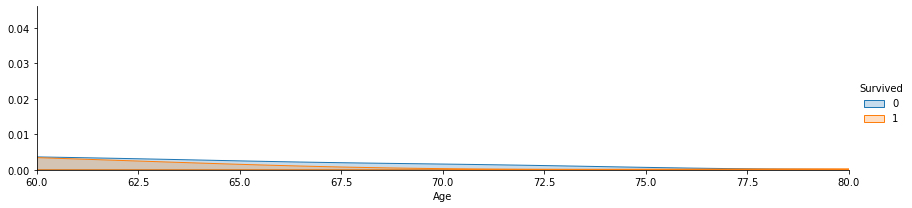

In [149]:
# 60세 이후의 그래프
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

### Binning (변수구간화)
: 연속형 변수를 특정 구간으로 나누어 범주형 또는 순위형 변수로 변환하는 방법을 말합니다. 예를 들면, 소득을 소득 분위로, 나이를 연령 구간이나 세대로 나누는 것이 구간화입니다. 이와 같이 구간화는 연속형 변수를 어떤 기준으로 구간으로 나누는 걸 말합니다.

In [150]:
for df in train_test_data:
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 26), 'Age'] = 1
    df.loc[(df['Age'] > 26) & (df['Age'] <= 36), 'Age'] = 2
    df.loc[(df['Age'] > 36) & (df['Age'] <= 62), 'Age'] = 3
    df.loc[ df['Age'] > 62, 'Age'] = 4

In [151]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


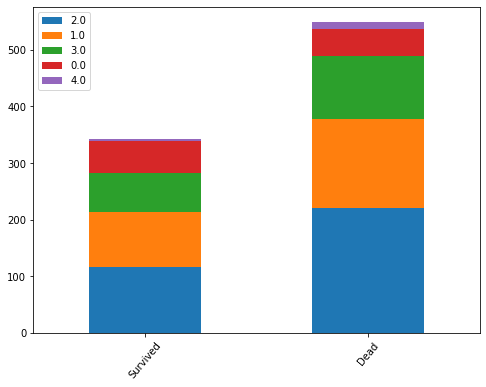

In [152]:
bar_chart('Age')

### 4. Embarked

<AxesSubplot:>

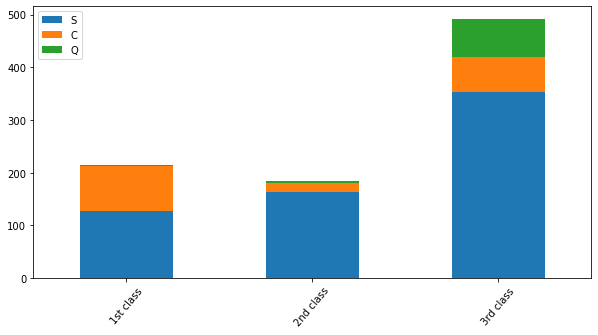

In [153]:
# Pclass별 Embarked 분포 확인

Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5), rot = 50)

In [154]:
# 결측치를 최빈 값인 'S'로 채움
for df in train_test_data:
    df['Embarked'] = df['Embarked'].fillna('S')

In [155]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [156]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for df in train_test_data:
    df['Embarked'] = df['Embarked'].map(embarked_mapping)

### 5. Fare

In [157]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


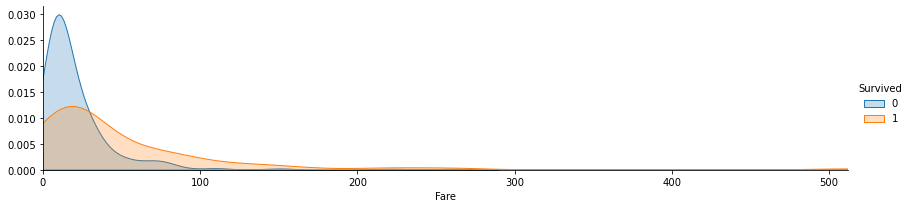

In [158]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

* 요금이 저렴한 사람들보다 비싼 사람들의 생존률이 높다

In [159]:
for df in train_test_data:
    df.loc[ df['Fare'] <= 17, 'Fare'] = 0
    df.loc[(df['Fare'] > 17) & (df['Fare'] <= 30), 'Fare'] = 1
    df.loc[(df['Fare'] > 30) & (df['Fare'] <= 100), 'Fare'] = 2
    df.loc[ df['Fare'] > 100, 'Fare'] = 3

### 6. Cabin

In [160]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
C22 C26        3
              ..
E50            1
B73            1
C87            1
C90            1
A14            1
Name: Cabin, Length: 147, dtype: int64

In [161]:
for df in train_test_data:
    df['Cabin'] = df['Cabin'].str[:1]

<AxesSubplot:>

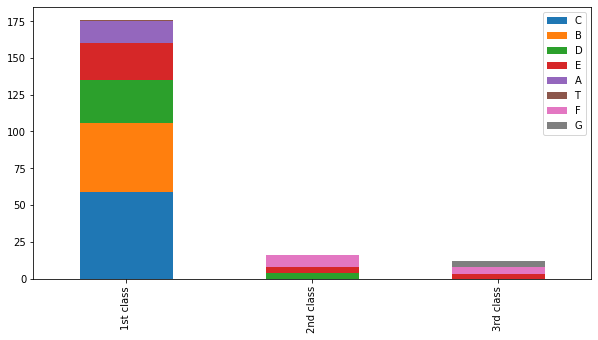

In [162]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [163]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for df in train_test_data:
    df['Cabin'] = df['Cabin'].map(cabin_mapping)

In [164]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### 7. FamilySize

In [165]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

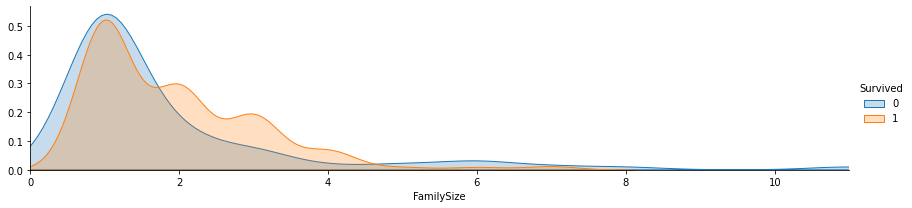

In [166]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [167]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for df in train_test_data:
    df['FamilySize'] = df['FamilySize'].map(family_mapping)

In [168]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [169]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [170]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [171]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [172]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4
